In [74]:
from timeit import timeit
from IPython.display import display
import matplotlib
# matplotlib.use("pgf")
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from collections import Counter
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import cohen_kappa_score, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from joblib import dump, load
from imblearn.under_sampling import RandomUnderSampler
import shap
import seaborn as sns

In [75]:
from compiledataset import load_dataset, compile_dataset

PATH = "/home/hampus/miun/master_thesis/Datasets"

datasets = {}

# dataset: pd.DataFrame = load_dataset(PATH + "/ORNL", "data_a.csv")
# dataset["remarks"] = "No DLC available"
# datasets["ROAD"] = dataset.to_dict("records")

dataset: pd.DataFrame = load_dataset(PATH + "/Survival", "data.csv")
dataset["remarks"] = "-"
datasets["Survival"] = dataset.to_dict("records")

# dataset: pd.DataFrame = load_dataset(PATH + "/Hisingen", "data.csv")
# dataset["remarks"] = "-"
# datasets["Hisingen"] = dataset.to_dict("records")


df = compile_dataset(datasets)

dataset = None # Release memory, as it isn't used for now
datasets = None

display(df)

,t,ID,DLC,dt,dt_ID,ones,ones_ID,run_diff,run_diff_ID,dataset,type,Label
0,0.000000,608,8,0.000444,0.009978,27,3,0.857143,0.500000,Survival,none,0
1,0.000232,672,8,0.000232,0.009977,20,3,0.818182,0.600000,Survival,none,0
2,0.000480,704,8,0.000248,0.009981,2,3,0.500000,0.500000,Survival,none,0
3,0.000714,809,8,0.000234,0.009978,21,5,0.857143,0.800000,Survival,none,0
4,0.000955,1349,8,0.000241,0.009978,7,5,0.800000,0.833333,Survival,none,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1735835,59.573580,562,8,0.000248,0.020620,1,4,0.333333,0.600000,Survival,none,0
1735836,59.573815,398,8,0.000235,0.013305,18,5,0.857143,0.500000,Survival,none,0
1735837,59.574057,401,8,0.000242,0.013092,18,4,0.866667,0.750000,Survival,none,0
1735838,59.574492,199,4,0.000435,0.012329,5,5,0.600000,0.666667,Survival,none,0


In [76]:
df.drop(columns=["d0", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "ID", "DLC", "t"], inplace=True, errors="ignore")

display(df)

,dt,dt_ID,ones,ones_ID,run_diff,run_diff_ID,dataset,type,Label
0,0.000444,0.009978,27,3,0.857143,0.500000,Survival,none,0
1,0.000232,0.009977,20,3,0.818182,0.600000,Survival,none,0
2,0.000248,0.009981,2,3,0.500000,0.500000,Survival,none,0
3,0.000234,0.009978,21,5,0.857143,0.800000,Survival,none,0
4,0.000241,0.009978,7,5,0.800000,0.833333,Survival,none,0
...,...,...,...,...,...,...,...,...,...
1735835,0.000248,0.020620,1,4,0.333333,0.600000,Survival,none,0
1735836,0.000235,0.013305,18,5,0.857143,0.500000,Survival,none,0
1735837,0.000242,0.013092,18,4,0.866667,0.750000,Survival,none,0
1735838,0.000435,0.012329,5,5,0.600000,0.666667,Survival,none,0


In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df.loc[:, (df.columns != "type") & (df.columns != "dataset") & (df.columns != "Label")] = StandardScaler(copy=True).fit_transform(
    df.loc[:, (df.columns != "type") & (df.columns != "dataset") & (df.columns != "Label")]
)

display(df)

,dt,dt_ID,ones,ones_ID,run_diff,run_diff_ID,dataset,type,Label
0,0.025851,-0.124694,1.237663,-0.651529,0.539687,-0.988099,Survival,none,0
1,-0.330970,-0.124696,0.518057,-0.651529,0.406869,-0.184480,Survival,none,0
2,-0.304066,-0.124692,-1.332360,-0.651529,-0.677815,-0.988099,Survival,none,0
3,-0.327356,-0.124694,0.620858,0.469571,0.539687,1.422758,Survival,none,0
4,-0.316113,-0.124694,-0.818355,0.469571,0.344887,1.690631,Survival,none,0
...,...,...,...,...,...,...,...,...,...
1735835,-0.304066,-0.114625,-1.435161,-0.090979,-1.245983,-0.184480,Survival,none,0
1735836,-0.325750,-0.121547,0.312455,0.469571,0.539687,-0.988099,Survival,none,0
1735837,-0.314105,-0.121748,0.312455,-0.090979,0.572154,1.020949,Survival,none,0
1735838,0.011150,-0.122470,-1.023957,0.469571,-0.336915,0.351266,Survival,none,0


In [78]:
X_train = df.drop(columns="type")
y_train = df["type"]

df = None # Release memory

# Split dataset into training and test data, stratify by the type of attack
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)

# Use feature "Label" as classification label
d_temp: pd.DataFrame = pd.concat([X_train, y_train], axis="columns")
X_train, y_train = d_temp.drop(columns="Label"), d_temp["Label"]
d_temp: pd.DataFrame = pd.concat([X_test, y_test], axis="columns")
X_test, y_test = d_temp.drop(columns="Label"), d_temp["Label"]
d_temp = None # Release memory

In [79]:
X_train.drop(columns=["type", "dataset"], inplace=True)
X_test.drop(columns=["type", "dataset"], inplace=True)

In [81]:
# X_train = df.loc[df["Label"] == 0]
# X_test = df.loc[df["Label"] == 1]
X_train_normal = X_train.loc[y_train[y_train == 0].index]
X_train_anomaly = X_train.loc[y_train[y_train == 1].index]

X_test_normal = X_test.loc[y_test[y_test == 0].index]
X_test_anomaly = X_test.loc[y_test[y_test == 1].index]

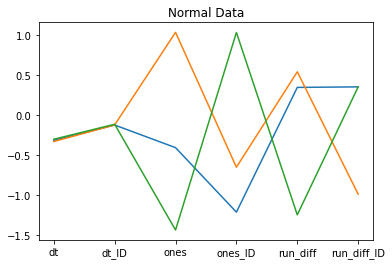

In [85]:
plt.plot(X_train_normal.iloc[0])
plt.plot(X_train_normal.iloc[1])
plt.plot(X_train_normal.iloc[2])
plt.title("Normal Data")
plt.show()

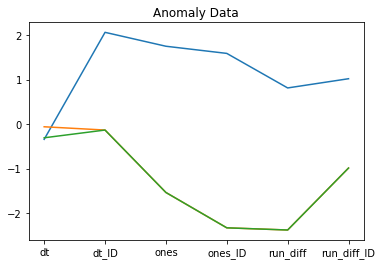

In [86]:
plt.plot(X_train_anomaly.iloc[0])
plt.plot(X_train_anomaly.iloc[1])
plt.plot(X_train_anomaly.iloc[2])
plt.title("Anomaly Data")
plt.show()

Autoencoder

In [71]:
import keras
from keras import Sequential, layers, callbacks
from keras.models import Model

class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Sequential([
            layers.Dense(5, activation="relu"),
            layers.Dense(4, activation="relu"),
            layers.Dense(3, activation="relu"),
            layers.Dense(2, activation="relu"),
            layers.Dense(1, activation="relu")
        ])
        self.decoder = Sequential([
            layers.Dense(2, activation="relu"),
            layers.Dense(3, activation="relu"),
            layers.Dense(4, activation="relu"),
            layers.Dense(5, activation="relu"),
            layers.Dense(6, activation="sigmoid")
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# input_img = keras.Input(shape=(6,))
# encoded = layers.Dense(4, activation='relu')(input_img)
# encoded = layers.Dense(2, activation='relu')(encoded)
# encoded = layers.Dense(1, activation='relu')(encoded)

# decoded = layers.Dense(2, activation='relu')(encoded)
# decoded = layers.Dense(4, activation='relu')(decoded)
# decoded = layers.Dense(6, activation='sigmoid')(decoded)

# autoencoder = keras.Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='msle')

model = AutoEncoder()

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

model.compile(optimizer='adam', loss="mae")
history = model.fit(X_train_normal, X_train_normal, epochs=50, batch_size=120,
    validation_data=(X_train[:,1:], X_train[:, 1:]),
    shuffle=True,
    callbacks=[early_stopping]
)

# history = autoencoder.fit(X_train, X_train,
#     epochs=100,
#     batch_size=256,
#     shuffle=True,
#     validation_data=(X_test, X_test),
#     callbacks=[early_stop]
# ).history

Epoch 1/100
502/502 [==============================] - 2s 3ms/step - loss: 0.2005 - val_loss: 0.1269
Epoch 2/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1892 - val_loss: 0.1218
Epoch 3/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1845 - val_loss: 0.1204
Epoch 4/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1826 - val_loss: 0.1202
Epoch 5/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1818 - val_loss: 0.1202
Epoch 6/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1815 - val_loss: 0.1204
Epoch 7/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1814 - val_loss: 0.1205
Epoch 8/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1813 - val_loss: 0.1204
Epoch 9/100
502/502 [==============================] - 1s 3ms/step - loss: 0.1813 - val_loss: 0.1207
Epoch 10/100
502/502 [==============================] - 2s 3ms/step - loss: 0.1813 - val_lo

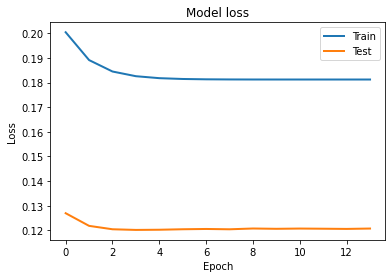

In [72]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [73]:
from keras import losses
from sklearn.metrics import accuracy_score

def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, X_train)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, X_test, threshold)
accuracy_score(predictions, y_test)
# 0.944

Threshold: 0.3931167811406787


0.11625111377392694